<a href="https://colab.research.google.com/github/Mardugo/ClaseMachineLearning/blob/main/DescensoGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller. Descenso del gradiente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Definamos nuestra hipótesis

In [2]:
"""
Definamos aquí nuestra hipótesis
"""
def hipotesis(theta0,theta1,x):
  estimados = theta0 + theta1*x
  return estimados

## Definiendo la función de costo

In [3]:
"""
La presente función recibe dos arreglos tipo Numpy del mismo tamaño y
retorna la mitad del Error Cuadrático Medio de los dos array
"""
def funcCosto(arr_1, arr_2):
  J = np.power(arr_1-arr_2,2)
  return np.sum(J)/(2*len(J))

## Definamos los gradientes

In [4]:
"""
Definamos los gradientes
"""
def gradienteTheta0(theta0Actual,theta1Actual,x,y):
  substra = hipotesis(theta0Actual,theta1Actual,x) - y
  pasoTheta0 = (1/x.shape[0])*(np.sum(substra))
  return pasoTheta0
def gradienteTheta1(theta0Actual,theta1Actual,x,y):
  pasoTheta1 = (1/x.shape[0])*np.sum((hipotesis(theta0Actual,theta1Actual,x)-y)*x)
  return pasoTheta1

## Hagamos el paso del descenso


In [5]:
"""
Un paso del gradiente
"""
def pasoDescensoGradiente(theta0Actual,theta1Actual,x,y,alpha):
  nuevoTheta0 = theta0Actual - alpha*gradienteTheta0(theta0Actual,theta1Actual,x,y)
  nuevoTheta1 = theta1Actual - alpha*gradienteTheta1(theta0Actual,theta1Actual,x,y)
  return (nuevoTheta0,nuevoTheta1)

## Apliquemoslo a nuestro problema

In [23]:
## Datos
x = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
y = np.array([0.169610271922408, 0.283395812542308, 0.386358737510785, 0.470227872390909, 0.433281293764675, 0.600267648212653, 0.738338980436742, 0.790315020494445, 0.877464268422459, 0.84356446225183, 0.96443891694455])

theta0 = 0.2
theta1 = 0.01


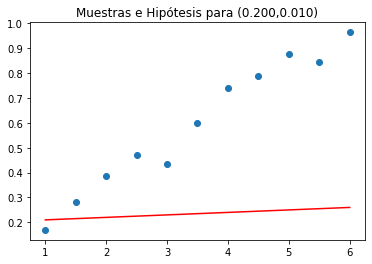

In [24]:
plt.scatter(x,y)
plt.plot(x,hipotesis(theta0,theta1,x),'r-')
plt.title("Muestras e Hipótesis para (%.3f,%.3f)"%(theta0,theta1))
plt.show()

diferencia:  0.011555675010600036
diferencia:  0.005339214934467734
diferencia:  0.0022262682086789665
diferencia:  0.0006685782424555031
diferencia:  -0.00010973522740553854
diferencia:  -0.0004974902687573113
diferencia:  -0.0006895358470856428
diferencia:  -0.0007835168788484781
diferencia:  -0.0008283662588342844
diferencia:  -0.0008486057480974196
diferencia:  -0.0008565239171492989
diferencia:  -0.0008582788982839096
diferencia:  -0.0008569566676987772
diferencia:  -0.0008541036473489472
diferencia:  -0.000850494740186114
diferencia:  -0.0008465182168961305
diferencia:  -0.0008423685948094339
diferencia:  -0.0008381432956191814
diferencia:  -0.000833891083618088
diferencia:  -0.0008296363396287643
diferencia:  -0.0008253912254360118
diferencia:  -0.0008211617797669324
diferencia:  -0.0008169509731779656
diferencia:  -0.0008127602389536304
diferencia:  -0.0008085902402870382
diferencia:  -0.0008044412547366653
diferencia:  -0.000800313366888572
diferencia:  -0.0007962065649037842


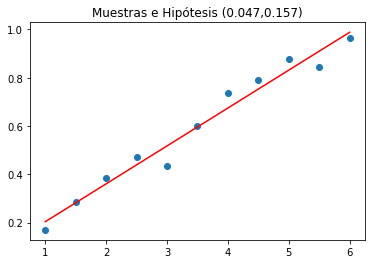

In [68]:
## Iteraciones
theta0 = 0.2
theta1 = 0.01
iter = 10000
alpha = (0.05/10)/10*2*2*2*2*2*2
J = list()
J.append(funcCosto(hipotesis(theta0,theta1,x),y))
for i in range(iter):
  # Para cada iteración calcular los nuevos parámetros de la hipótesis

  (theta0n,theta1n) = pasoDescensoGradiente(theta0,theta1,x,y,alpha)
  print("diferencia: ",theta0n-theta0)
  J.append(funcCosto(hipotesis(theta0,theta1,x),y))
  if (np.abs(theta0n-theta0))<0.000000001:
    print(np.abs(theta0n-theta0))
    break
  theta0 = theta0n
  theta1 = theta1n

plt.scatter(x,y)
plt.plot(x,hipotesis(theta0,theta1,x),'r-')
plt.title("Muestras e Hipótesis (%.3f,%.3f)"%(theta0,theta1))
plt.show()
time.sleep(0.5)


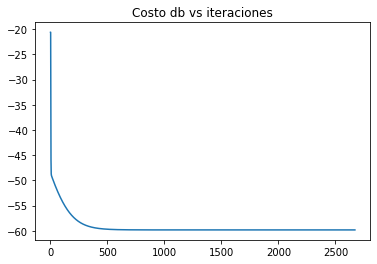

In [69]:
ampDb = 20*np.log10(np.array(J))
plt.plot(range(1,len(J)+1),ampDb)
plt.title('Costo db vs iteraciones')
plt.show()